<a href="https://colab.research.google.com/github/MoazzemhossainMoazz/EDGE_AI/blob/main/Hart_disease_prediction_for_practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split , GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
import xgboost
from xgboost import XGBClassifier

In [21]:
#loading the csv data to a pandas dataframe
heart_data = pd.read_csv('/content/heart_disease_dataset.csv')

In [22]:
heart_data

,age,BP,cholestrol,heart disease
0,70,130,322,1
1,67,115,564,0
2,57,124,261,1
3,64,128,263,0
4,74,120,269,0
...,...,...,...,...
265,52,172,199,0
266,44,120,263,0
267,56,140,294,0
268,57,140,192,0


In [23]:
#print firtst 5 rows of the dataset
heart_data.head()

,age,BP,cholestrol,heart disease
0,70,130,322,1
1,67,115,564,0
2,57,124,261,1
3,64,128,263,0
4,74,120,269,0


In [24]:
#print last 5 rows of the dataset
heart_data.tail()

,age,BP,cholestrol,heart disease
265,52,172,199,0
266,44,120,263,0
267,56,140,294,0
268,57,140,192,0
269,67,160,286,1


In [25]:
#number of rows and column in the dataset
heart_data.shape

(270, 4)

In [26]:
#getting some info about the data
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   age            270 non-null    int64
 1   BP             270 non-null    int64
 2   cholestrol     270 non-null    int64
 3   heart disease  270 non-null    int64
dtypes: int64(4)
memory usage: 8.6 KB


In [27]:
#checking for missing values
heart_data.isnull().sum()

age              0
BP               0
cholestrol       0
heart disease    0
dtype: int64

In [28]:
print(f"There are{heart_data.duplicated().sum()} duplicates data")
heart_data.loc[heart_data.duplicated(keep=False)].sort_values(by=heart_data.columns.to_list())

There are0 duplicates data


,age,BP,cholestrol,heart disease


In [29]:
heart_data.drop_duplicates(inplace=True)

In [30]:
#statistical measures about the data
heart_data.describe()

,age,BP,cholestrol,heart disease
count,270.000000,270.000000,270.000000,270.000000
mean,54.433333,131.344444,249.659259,0.444444
std,9.109067,17.861608,51.686237,0.497827
min,29.000000,94.000000,126.000000,0.000000
25%,48.000000,120.000000,213.000000,0.000000
50%,55.000000,130.000000,245.000000,0.000000
75%,61.000000,140.000000,280.000000,1.000000
max,77.000000,200.000000,564.000000,1.000000


In [31]:
print(f"There are{heart_data.duplicated().sum()} duplicates data")
heart_data.loc[heart_data.duplicated(keep=False)].sort_values(by=heart_data.columns.to_list())

There are0 duplicates data


,age,BP,cholestrol,heart disease


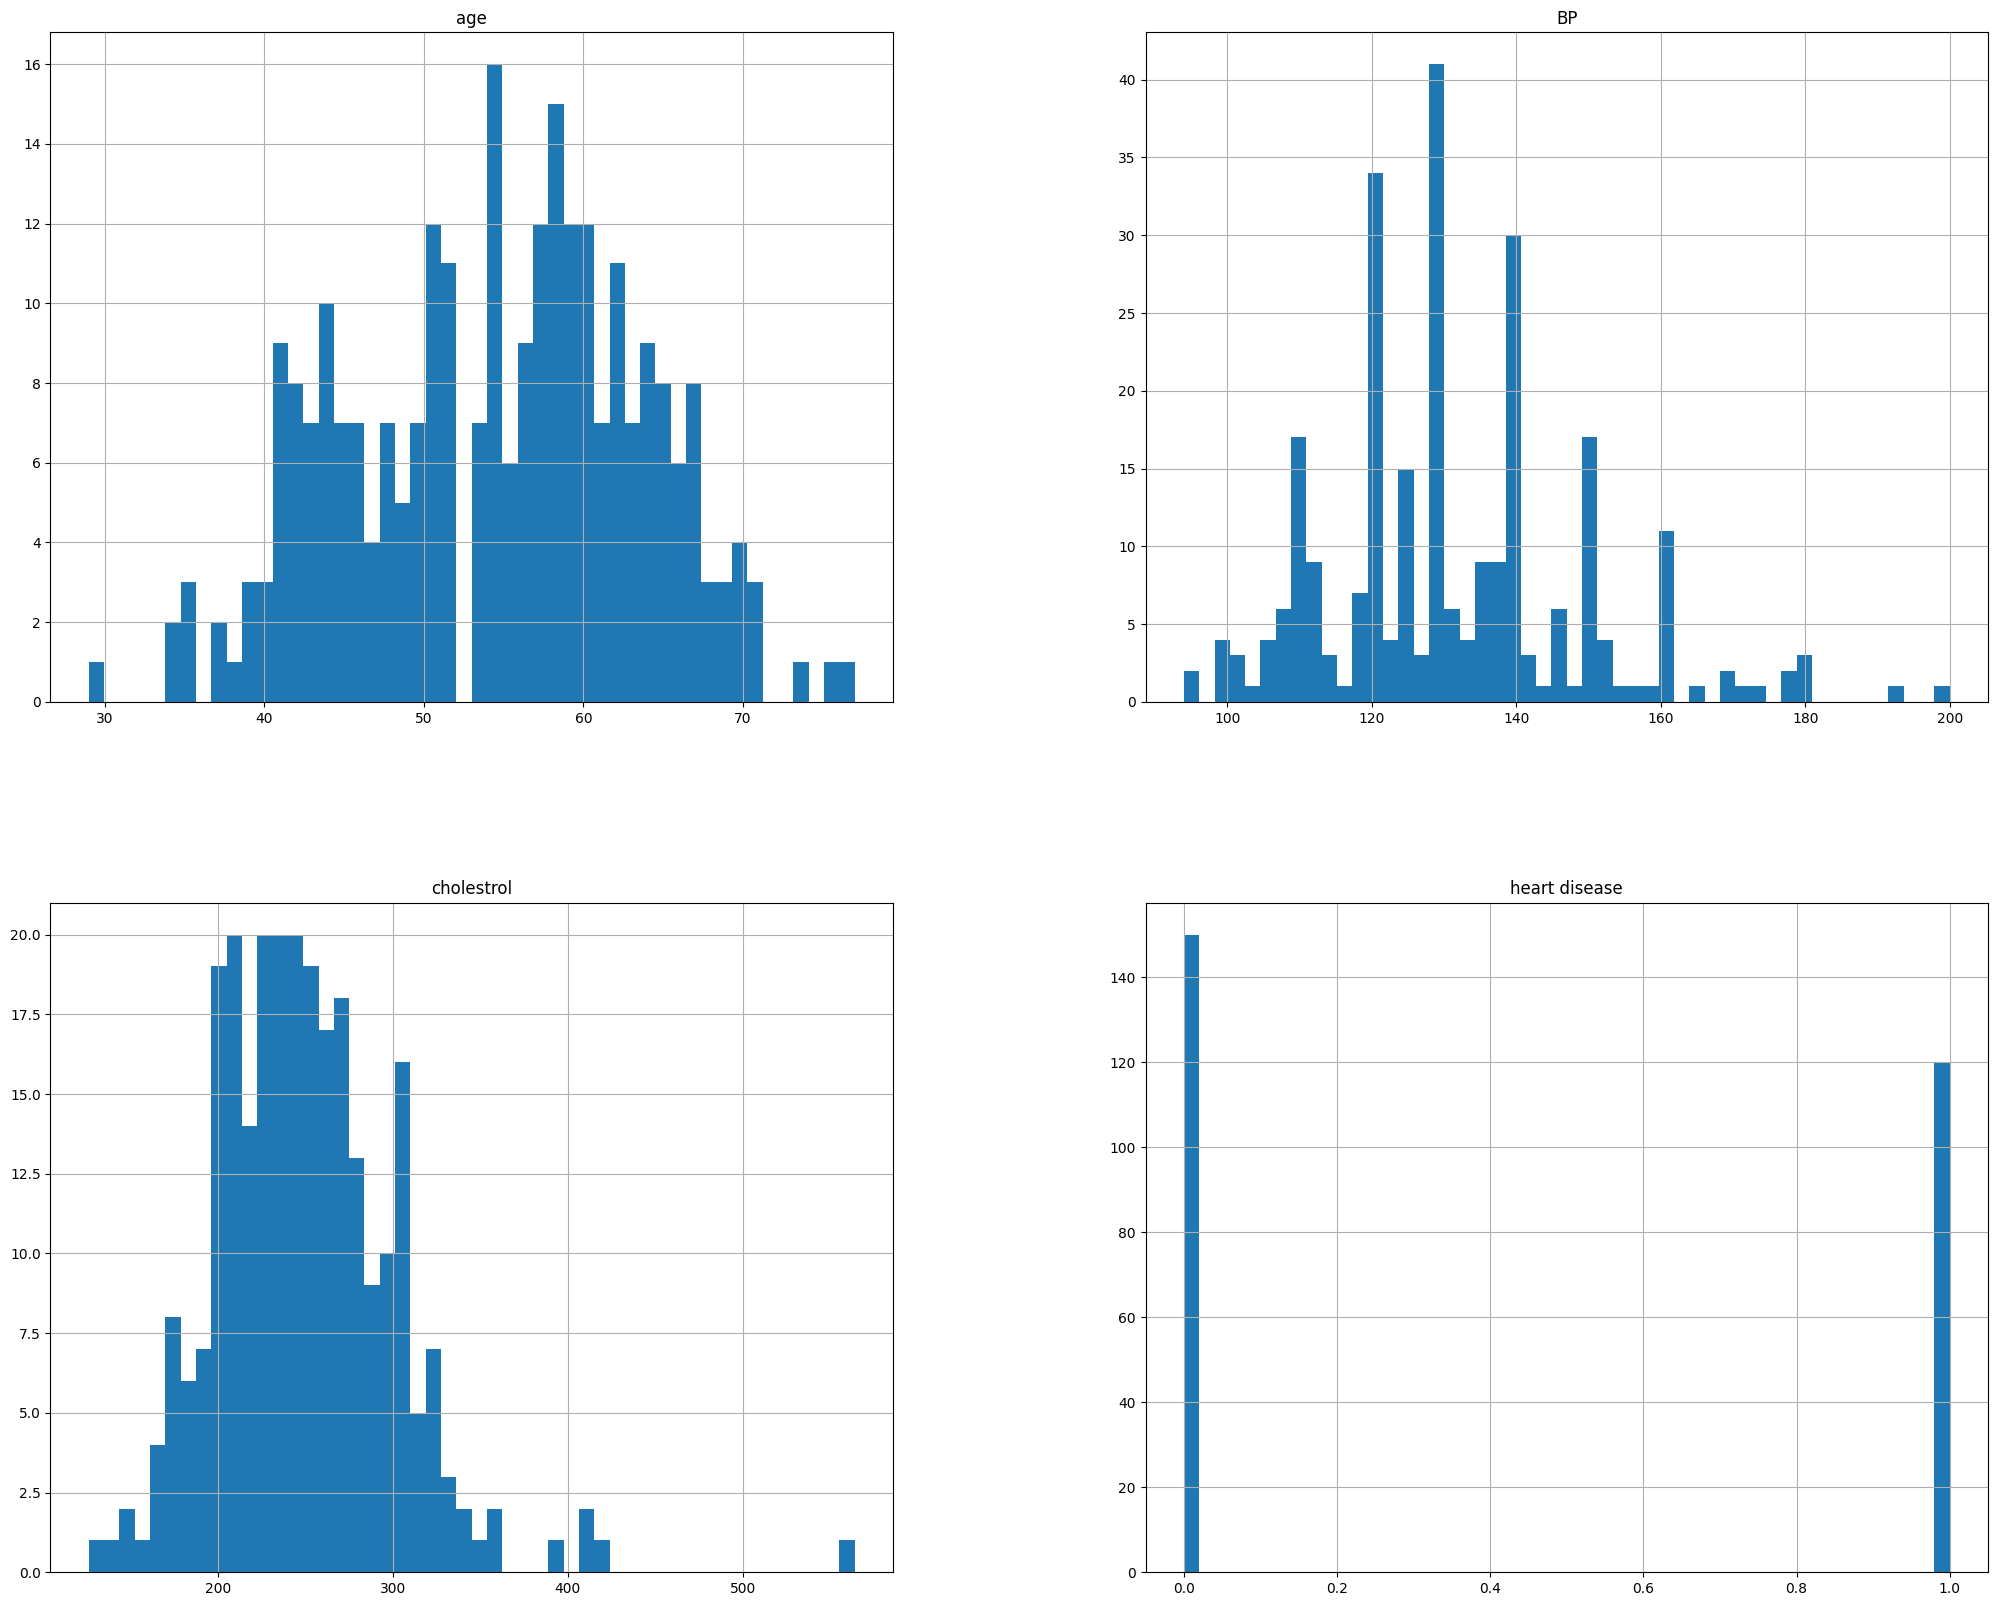

In [32]:
heart_data.hist(bins=50, figsize=(25, 20))
plt.show()

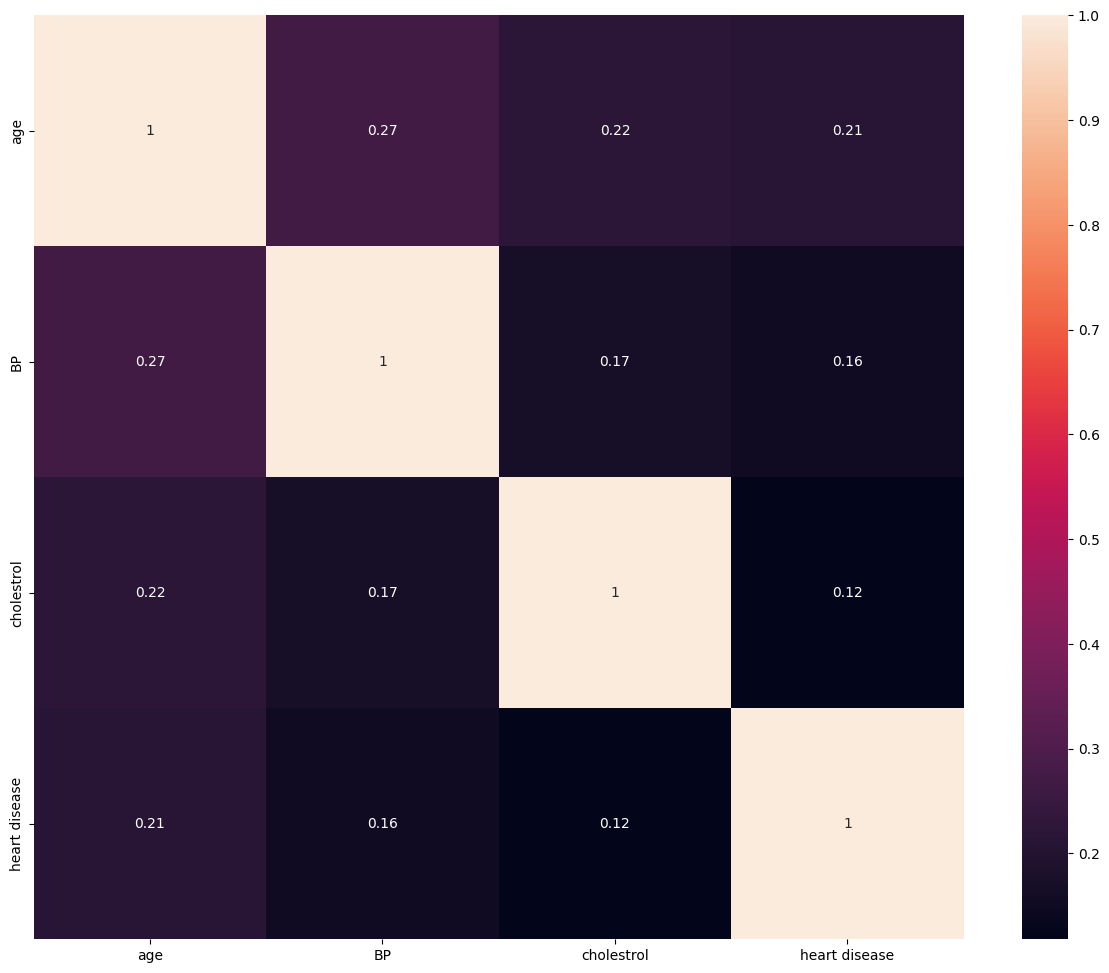

In [33]:
plt.figure(figsize=(15,12))
sns.heatmap(heart_data.corr(), annot=True)
plt.show()

In [34]:
correlation_matrix = heart_data.corr(method='pearson')
correlation_matrix

,age,BP,cholestrol,heart disease
age,1.000000,0.273053,0.220056,0.212322
BP,0.273053,1.000000,0.173019,0.155383
cholestrol,0.220056,0.173019,1.000000,0.118021
heart disease,0.212322,0.155383,0.118021,1.000000


In [35]:
#checking the distribution of target variable
heart_data['heart disease'].value_counts()

0    150
1    120
Name: heart disease, dtype: int64

In [36]:
pip install featurewiz

In [37]:
from featurewiz import featurewiz

############################################################################################
############       F A S T   F E A T U R E  E N G G    A N D    S E L E C T I O N ! ########
# Be judicious with featurewiz. Don't use it to create too many un-interpretable features! #
############################################################################################
featurewiz has selected 0.7 as the correlation limit. Change this limit to fit your needs...
Skipping feature engineering since no feature_engg input...
Skipping category encoding since no category encoders specified in input...
#### Single_Label Binary_Classification problem ####
    Loaded train data. Shape = (270, 4)
    Some column names had special characters which were removed...
#### Single_Label Binary_Classification problem ####
No test data filename given...
#######################################################################################
######################## C L A S S I F Y I N G  V A R I A B L E S  

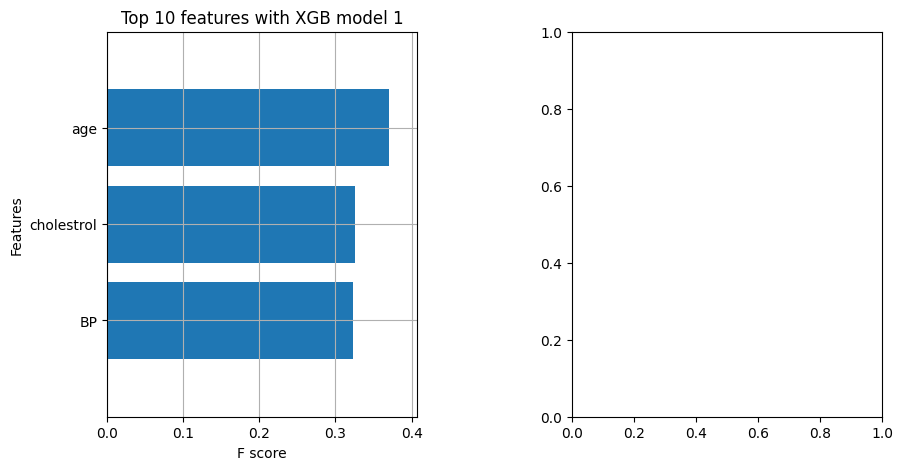

    Completed XGBoost feature selection in 0 seconds
#######################################################################################
#####          F E A T U R E   S E L E C T I O N   C O M P L E T E D            #######
#######################################################################################
Selected 3 important features:
['age', 'BP', 'cholestrol']
Total Time taken for featurewiz selection = 0 seconds
Output contains a list of 3 important features and a train dataframe


In [39]:
target = 'heart disease'
features= featurewiz(heart_data, target, corr_limit=0.7, verbose=2, sep=",",
header=0,test_data="", feature_engg="", category_encoders="")

In [42]:
x = heart_data.drop(columns='heart disease', axis=1)
y = heart_data['heart disease']


In [43]:
print(x)

     age   BP  cholestrol
0     70  130         322
1     67  115         564
2     57  124         261
3     64  128         263
4     74  120         269
..   ...  ...         ...
265   52  172         199
266   44  120         263
267   56  140         294
268   57  140         192
269   67  160         286

[270 rows x 3 columns]


In [44]:
print(y)

0      1
1      0
2      1
3      0
4      0
      ..
265    0
266    0
267    0
268    0
269    1
Name: heart disease, Length: 270, dtype: int64


In [45]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=0)

In [46]:
print(x.shape, x_train.shape, x_test.shape)

(270, 3) (216, 3) (54, 3)


In [47]:
rf1 = RandomForestClassifier()
rf1.fit(x_train, y_train.ravel())
predictions = rf1.predict(x_test)

print(classification_report(y_test, predictions))
#import result of mse
print("mse=", metrics.mean_squared_error(y_test, predictions))
#import result of mae
print("msle=", metrics.mean_squared_log_error(y_test, predictions))
#import result of mae
print("mae=", metrics.mean_absolute_error(y_test, predictions))
#import result of rmse
print("rmse=", np.sqrt(metrics.mean_squared_error(y_test, predictions)))

              precision    recall  f1-score   support

           0       0.63      0.57      0.60        30
           1       0.52      0.58      0.55        24

    accuracy                           0.57        54
   macro avg       0.57      0.57      0.57        54
weighted avg       0.58      0.57      0.58        54

mse= 0.42592592592592593
msle= 0.20463739481701163
mae= 0.42592592592592593
rmse= 0.6526300069150406


In [48]:
#Decison Tree
DT1 = DecisionTreeClassifier()
DT1.fit(x_train, y_train.ravel())
predictions1 = DT1.predict(x_test)

# print classification report
print(classification_report(y_test, predictions1))
#import result of mse
print("mse=",  metrics.mean_squared_error(y_test, predictions1))
#import result of mae
print("msle=",  metrics.mean_squared_log_error(y_test, predictions1))
#import result of mae
print("mae=", metrics.mean_absolute_error(y_test, predictions1))
#import result of rmse
print("rmse=", np.sqrt(metrics.mean_squared_error(y_test, predictions1)))


              precision    recall  f1-score   support

           0       0.57      0.53      0.55        30
           1       0.46      0.50      0.48        24

    accuracy                           0.52        54
   macro avg       0.52      0.52      0.52        54
weighted avg       0.52      0.52      0.52        54

mse= 0.48148148148148145
msle= 0.23132922892357843
mae= 0.48148148148148145
rmse= 0.693888666488711


In [50]:
# XGB classifier machine object
XGB1 = XGBClassifier()
# train the model on train set
XGB1.fit(x_train, y_train.ravel())
predictions2 = XGB1.predict(x_test)

# print classification report
print(classification_report(y_test, predictions2))
#import result of mse
print("mse=",  metrics.mean_squared_error(y_test, predictions2))
#import result of mae
print("msle=",  metrics.mean_squared_log_error(y_test, predictions2))
#import result of mae
print("mae=", metrics.mean_absolute_error(y_test, predictions2))
#import result of rmse
print("rmse=", np.sqrt(metrics.mean_squared_error(y_test, predictions2)))

              precision    recall  f1-score   support

           0       0.54      0.47      0.50        30
           1       0.43      0.50      0.46        24

    accuracy                           0.48        54
   macro avg       0.48      0.48      0.48        54
weighted avg       0.49      0.48      0.48        54

mse= 0.5185185185185185
msle= 0.24912378499462287
mae= 0.5185185185185185
rmse= 0.7200822998230956


In [51]:
# KNN classifier machine object
KNN1 =  KNeighborsClassifier()
# train the model on train set
KNN1.fit(x_train, y_train.ravel())
predictions3 = KNN1.predict(x_test)

# print classification report
print(classification_report(y_test, predictions3))
#import result of mse
print("mse=",  metrics.mean_squared_error(y_test, predictions3))
#import result of mae
print("msle=",  metrics.mean_squared_log_error(y_test, predictions3))
#import result of mae
print("mae=", metrics.mean_absolute_error(y_test, predictions3))
#import result of rmse
print("rmse=", np.sqrt(metrics.mean_squared_error(y_test, predictions3)))

              precision    recall  f1-score   support

           0       0.64      0.60      0.62        30
           1       0.54      0.58      0.56        24

    accuracy                           0.59        54
   macro avg       0.59      0.59      0.59        54
weighted avg       0.60      0.59      0.59        54

mse= 0.4074074074074074
msle= 0.1957401167814894
mae= 0.4074074074074074
rmse= 0.6382847385042254


In [52]:
# support vector machine object
svm1 = SVC(kernel='linear')
# train the model on train set
svm1.fit(x_train, y_train.ravel())
predictions4 = svm1.predict(x_test)

# print classification report
print(classification_report(y_test, predictions4))
#import result of mse
print("mse=",  metrics.mean_squared_error(y_test, predictions4))
#import result of mae
print("msle=",  metrics.mean_squared_log_error(y_test, predictions4))
#import result of mae
print("mae=", metrics.mean_absolute_error(y_test, predictions4))
#import result of rmse
print("rmse=", np.sqrt(metrics.mean_squared_error(y_test, predictions4)))

              precision    recall  f1-score   support

           0       0.68      0.63      0.66        30
           1       0.58      0.62      0.60        24

    accuracy                           0.63        54
   macro avg       0.63      0.63      0.63        54
weighted avg       0.63      0.63      0.63        54

mse= 0.37037037037037035
msle= 0.17794556071044493
mae= 0.37037037037037035
rmse= 0.6085806194501846


In [53]:
pip install imblearn

In [54]:
from imblearn.over_sampling import SMOTE
sm_over = SMOTE(random_state=2)

In [55]:
x_train_res, y_train_res = sm_over.fit_resample(x_train, y_train.ravel())

In [56]:
print('After OverSampling, the shape of train_X: {}'.format(x_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))



print("Before OverSampling, counts of label '1': {}".format(sum(y_train == 1)))
print("Before OverSampling, counts of label '0': {}".format(sum(y_train== 0)))
print("After OverSampling, counts of label '1': {}".format(sum(y_train_res == 1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res == 0)))

After OverSampling, the shape of train_X: (240, 3)
After OverSampling, the shape of train_y: (240,) 

Before OverSampling, counts of label '1': 96
Before OverSampling, counts of label '0': 120
After OverSampling, counts of label '1': 120
After OverSampling, counts of label '0': 120
